In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

city_data_original = pd.read_csv(city_data)
ride_data_original = pd.read_csv(ride_data)

In [15]:
ride_data_original.head()
ride_data_clean = ride_data_original.drop(columns=['ride_id'])

ride_data_sum = ride_data_clean
ride_data_sum = ride_data_sum.groupby(['city'], as_index = False).sum()

ride_data_mean = ride_data_clean
ride_data_mean = ride_data_mean.groupby(['city'], as_index = False).mean().round(2)

ride_count = ride_data_clean
ride_count = ride_count["city"].value_counts()

ride_count_df = pd.DataFrame.from_dict(ride_count)
ride_count_df = ride_count_df.reset_index().rename(columns= {"index": 'city', "city": 'ride count'})

combined_data = pd.merge(ride_count_df, city_data_original, on='city')
combined_data2 = pd.merge(ride_data_mean, combined_data, on='city')
combined_data3 = pd.merge(ride_data_sum, combined_data2, on='city')
combined_data_final = combined_data3.rename(columns={"city":"City","fare_x":"Total Fare", "fare_y":"Average Fare",
                                                     "ride count": "Rides Per City","driver_count":"Total Drivers"}) 

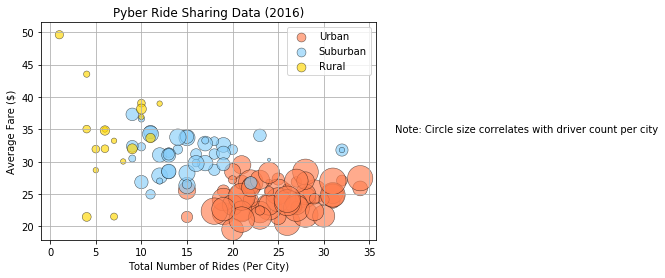

In [16]:
urban_df = combined_data_final.loc[combined_data_final["type"] == "Urban"]
suburban_df = combined_data_final.loc[combined_data_final["type"] == "Suburban"]
rural_df = combined_data_final.loc[combined_data_final["type"] == "Rural"]

riders_urban = urban_df["Rides Per City"]
fare_urban = urban_df["Average Fare"]
drivers_urban = urban_df["Total Drivers"]*10
riders_suburban = suburban_df["Rides Per City"]
fare_suburban = suburban_df["Average Fare"]
drivers_suburban = suburban_df["Total Drivers"]*10
riders_rural = rural_df["Rides Per City"]
fare_rural = rural_df["Average Fare"]
drivers_rural = rural_df["Total Drivers"]*10
fig = plt.figure()

urban_df = plt.scatter(riders_urban, fare_urban, s=drivers_urban, color="coral", edgecolors="black", linewidths = .5, label = "Urban", alpha=0.65)
suburban_df = plt.scatter(riders_suburban, fare_suburban, s=drivers_suburban ,color="lightskyblue", linewidths = .5, edgecolors="black",label = "Suburban", alpha=0.65)
rural_df = plt.scatter(riders_rural, fare_rural, s=drivers_rural , color="Gold", linewidths = .5, edgecolors="black",label = "Rural", alpha=0.65)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
text = "Note: Circle size correlates with driver count per city"
fig.text(1.25, .5, text, ha='center')

lgnd = plt.legend(handles=[urban_df, suburban_df, rural_df], loc="best")
lgnd.legendHandles[0]._sizes = [80]
lgnd.legendHandles[1]._sizes = [80]
lgnd.legendHandles[2]._sizes = [80]

plt.grid()

In [11]:
pie_charts_df = combined_data_final
pie_charts = pie_charts_df.groupby(['type'], as_index = False).sum()

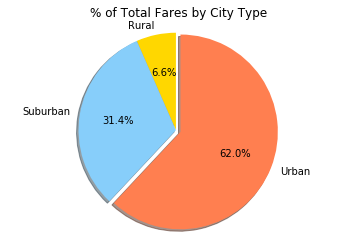

In [17]:
total_fare_pie = pie_charts["Total Fare"]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "coral"]
explode=(0,0,.05)

plt.pie(total_fare_pie, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

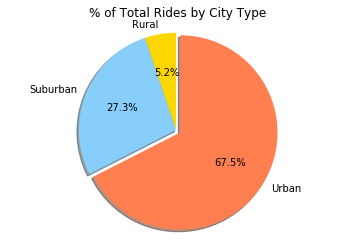

In [18]:
rides_pie = pie_charts["Rides Per City"]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "coral"]

plt.pie(rides_pie, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

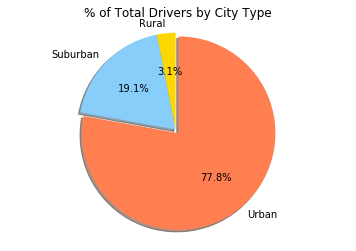

In [19]:
total_drivers_pie = pie_charts["Total Drivers"]
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "coral"]

plt.pie(total_drivers_pie, explode = explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()